In [1]:
import numpy as np
import pandas as pd
import simplejson as json
import matplotlib.pylab as plt
import mpl_toolkits.basemap as bm
from scipy.stats.stats import pearsonr
import matplotlib.patches as mpatches
import argparse
import requests
import datetime
import dateutil
import logging
import twitter
import shutil
import errno
import time
import csv
import sys
import os

%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import twitter
import matplotlib.pyplot as plt
import csv
#import time
import sys
import re
import requests
import json
import time
import sys
import seaborn as sns

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('condominium.csv', sep=',')

In [3]:
processed_locs = {}
def get_coords_by_address(address):
    address.replace(' ', '+')
    request = 'http://maps.google.com/maps/api/geocode/json?address='+address+'&sensor=false'
    try:
        r = requests.get(request)
        j = json.loads(r.content)
        respond = j['results'][0]['geometry']
        if (j['status']=='OVER_QUERY_LIMIT'):
            print "Sleeping for 2 sec"
            time.sleep(2)
            j = json.loads(r.content)
        loc = (respond['location']['lat'], respond['location']['lng'], respond['location_type'])
        return loc
    except Exception as e:
        print e
        print j
        if (j['status']=='OVER_QUERY_LIMIT'):
            try:
                print "Sleeping for 2 sec"
                time.sleep(2)
                r = requests.get(request)
                j = json.loads(r.content)
                respond = j['results'][0]['geometry']
                loc = (respond['location']['lat'], respond['location']['lng'], respond['location_type'])
                return loc
            except Exception as e:
                print "2 exc"
                print j
                return (0, 0, 'null')
    

In [7]:
addresses = df['PROPERTY Address']

In [ ]:
lat, lng = map(float, addresses[0].split('\n')[2].strip('()').split(','))

In [29]:
len(addresses)

8351

In [ ]:
coords = []
for i in xrange(len(addresses)):
    spl = addresses[i].split('\n')
    sys.stdout.write('\rAddr %.5f ' % (float(i)/len(addresses)))
    try:
        if len(spl)>2:
            lat, lng = map(float, spl[2].strip('()').split(','))
        if df['District'][i]=='Manhattan' or df['District'][i]=='Queens':
            print addresses[i]
            lat, lng = get_coords_by_address(addresses[i])
        if lat==0 and lng==0:
            continue
        coords.append([i, lat, lng])
    except Exception as e:
        continue

In [34]:
len(coords)

7327

In [35]:
a = np.array(coords)

In [36]:
image = plt.imread('new_york.png')

In [37]:
#ind = a[:,1]
ind = a[:,2]>-74.2
b = a[ind==True]
x = b[:,2]
y = b[:,1]

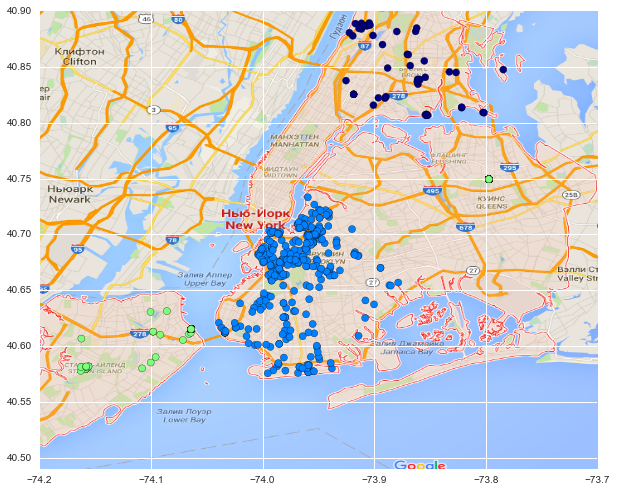

In [107]:
plt.figure(figsize=(10, 10))
plt.xlim([-74.2, -73.7])
plt.ylim([40.49, 40.9])
plt.scatter(x, y, c=colors, cmap=CM.jet, s=50)
img_bounds = (-74.272950,-73.694915, 40.489464,  40.938429)
plt.imshow(image, extent=img_bounds)
plt.show()


In [90]:
df.columns

Index([u'Unnamed: 0', u'District', u'PROPERTY Address',
       u'PROPERTY Boro-Block-Lot', u'PROPERTY Building Classification',
       u'PROPERTY Condo Section', u'PROPERTY Full Market Value',
       u'PROPERTY Gross Income per SqFt', u'PROPERTY Gross SqFt',
       u'PROPERTY Market Value per SqFt', u'PROPERTY Neighborhood',
       u'PROPERTY Total Units', u'PROPERTY Year Built', u'RENTAL 1 Address',
       u'RENTAL 1 Boro-Block-Lot', u'RENTAL 1 Building Classification',
       u'RENTAL 1 Full Market Value', u'RENTAL 1 Gross Income per SqFt',
       u'RENTAL 1 Gross SqFt', u'RENTAL 1 Market Value per SqFt',
       u'RENTAL 1 Neighborhood', u'RENTAL 1 Total Units',
       u'RENTAL 1 Year Built', u'Year'],
      dtype='object')

In [91]:
areas = df['District']
areas = areas[ind==True]

C:\Users\denilv\Anaconda2\lib\site-packages\pandas\core\internals.py:215: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8351 but corresponding boolean dimension is 7327
  return self.values[slicer]
C:\Users\denilv\Anaconda2\lib\site-packages\pandas\indexes\base.py:1267: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8351 but corresponding boolean dimension is 7327
  result = getitem(key)


In [96]:
cmap = np.unique(areas)
d = dict(zip(cmap,arange(len(cmap))))
colors = []
for i in areas:
    colors.append(d[i])

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim([-74.2, -73.7])
plt.ylim([40.49, 40.9])
plt.scatter(x, y)
img_bounds = (-74.272950,-73.694915, 40.489464,  40.938429)
plt.imshow(image, extent=img_bounds)
plt.show()


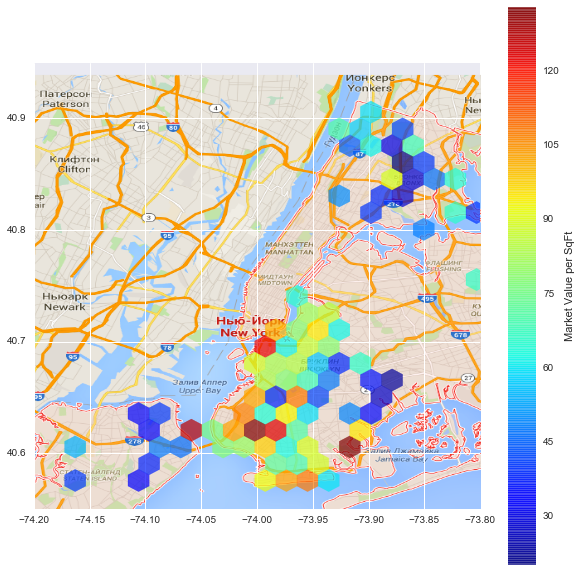

In [25]:
name = 'Market Value per SqFt'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=20, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label(name)
plt.imshow(image, extent=img_bounds)
plt.show()   

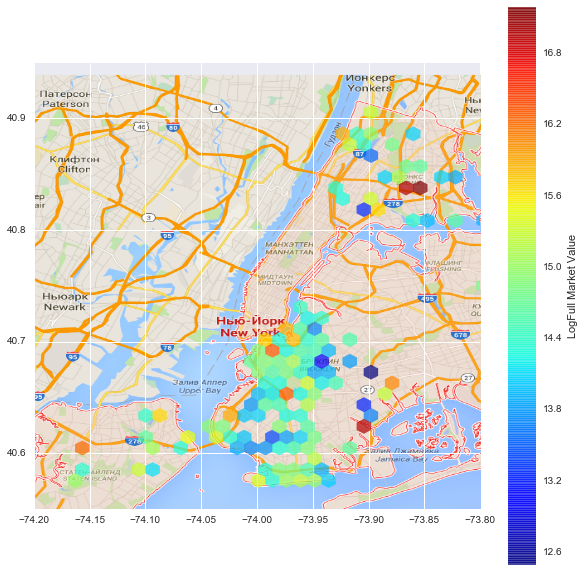

In [85]:
name = 'Full Market Value'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
values = np.log(values)
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=30, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label('Log' + name)
plt.imshow(image, extent=img_bounds)
plt.show()   

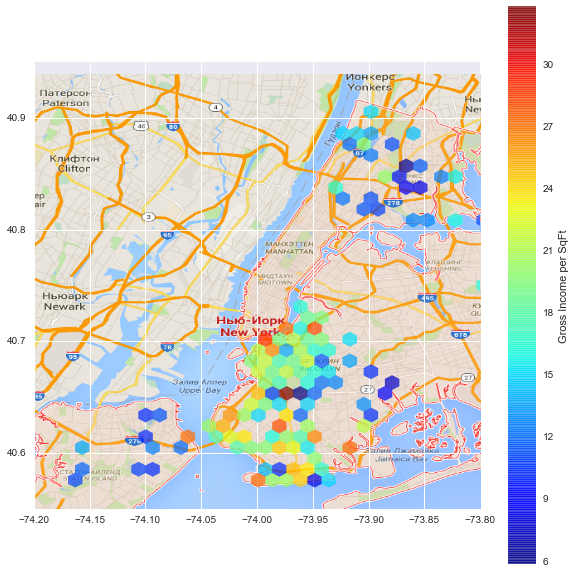

In [62]:
name = 'Gross Income per SqFt'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=30, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label(name)
plt.imshow(image, extent=img_bounds)
plt.show()   

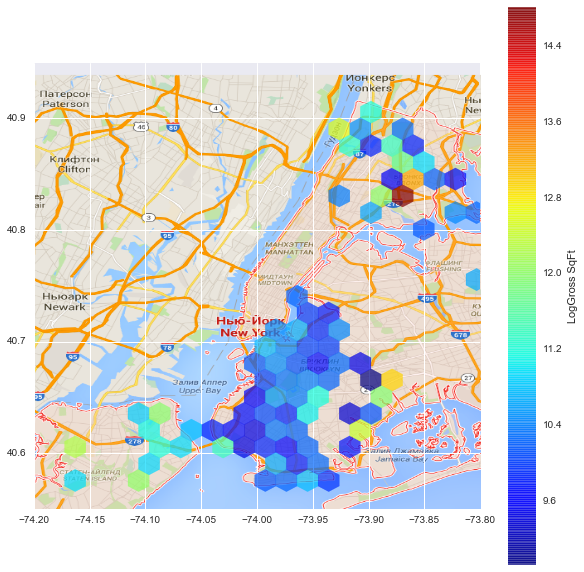

In [82]:
name = 'Gross SqFt'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
values = np.log(values)
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=20, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label('Log' + name)
plt.imshow(image, extent=img_bounds)
plt.show()   

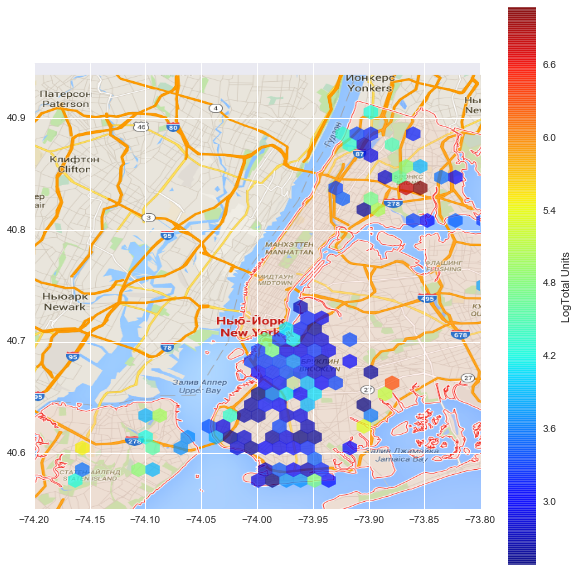

In [86]:
name = 'Total Units'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
values = np.log(values)
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=30, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label('Log' + name)
plt.imshow(image, extent=img_bounds)
plt.show()   

In [2]:
TRAINING_SET_URL = "data/csv/BR20112012.csv"
df_brooklyn = pd.read_csv(TRAINING_SET_URL, sep=",")


In [3]:
from pprint import pprint
with open("data/json/BR20112012.json","r") as data_file:
    json_data = json.load(data_file)
    

In [4]:
ny_rental_data = dict()
with open("data/json/BR20112012.json","r") as data_file:
    brooklyn_json = json.load(data_file)
with open("data/json/QU20112012.json","r") as data_file:
    queens_json = json.load(data_file)
with open("data/json/MH20112012.json","r") as data_file:
    manhattan_json = json.load(data_file)
with open("data/json/SI20112012.json","r") as data_file:
    statenisland_json = json.load(data_file)
with open("data/json/BX20112012.json","r") as data_file:
    bronx_json = json.load(data_file)

In [5]:
ny_rental_data["booklyn"] = brooklyn_json["data"]
ny_rental_data["queens"]  = queens_json["data"]
ny_rental_data["manhattan"] = manhattan_json["data"]
ny_rental_data["statenisland"] = statenisland_json["data"]
ny_rental_data["bronx"] = bronx_json["data"]

In [6]:
total = 0
for district in ny_rental_data:
    total += len(ny_rental_data[district])
    print "%s :  %d" %(district,len(ny_rental_data[district]))
print "%s :  %d" % ("total", total)

bronx :  69
queens :  434
statenisland :  26
manhattan :  1381
booklyn :  717
total :  2627


In [7]:
brooklyn_nbh = list(set([ i[11] for i in ny_rental_data["booklyn"] ]))
queens_nbh = list(set([ i[11] for i in ny_rental_data["queens"] ]))
manhattan_nbh = list(set([ i[11] for i in ny_rental_data["manhattan"] ]))
statenisland_nbh = list(set([ i[11] for i in ny_rental_data["statenisland"] ]))
bronx_nbh = list(set([ i[11] for i in ny_rental_data["booklyn"]]))

In [8]:
print bronx_nbh

['KENSINGTON', 'PARK SLOPE SOUTH', 'COBBLE HILL-WEST', 'WILLIAMSBURG-CENTRAL', 'CLINTON HILL', 'COBBLE HILL', 'BAY RIDGE', 'CANARSIE', 'FLATBUSH-CENTRAL', 'FLATBUSH-LEFFERTS GARDEN', 'BENSONHURST', 'CARROLL GARDENS', 'FORT GREENE', 'DOWNTOWN-FULTON MALL', 'OCEAN HILL', 'WILLIAMSBURG-EAST', 'GRAVESEND', 'OCEAN PARKWAY-SOUTH', 'BUSHWICK', 'DOWNTOWN-METROTECH', 'BRIGHTON BEACH', 'SUNSET PARK', 'BROOKLYN HEIGHTS', 'WINDSOR TERRACE', 'DOWNTOWN-FULTON FERRY', 'MILL BASIN', 'BOERUM HILL', 'DYKER HEIGHTS', 'FLATBUSH-EAST', 'EAST NEW YORK', 'WYCKOFF HEIGHTS', 'WILLIAMSBURG-NORTH', 'BOROUGH PARK', 'MADISON', 'GREENPOINT', 'OCEAN PARKWAY-NORTH', 'BEDFORD STUYVESANT', 'PARK SLOPE', 'CROWN HEIGHTS', 'CONEY ISLAND', 'BATH BEACH', 'BUSH TERMINAL', 'PROSPECT HEIGHTS', 'MIDWOOD', 'FLATBUSH-NORTH', 'SHEEPSHEAD BAY', 'BERGEN BEACH', 'GOWANUS', 'WILLIAMSBURG-SOUTH']


In [9]:
def barh_plot(dataset,features_numbers,feature_names,figure_size=(10,15)):
    f1_data = [i[features_numbers[0]] for i in dataset] #Categorial data
    f2_data = [float(i[features_numbers[1]]) for i in dataset] #Numeric data
    data = [[f1_data[i],f2_data[i]] for i in xrange(0,len(f1_data))]
    
    data_df = pd.DataFrame(data,columns=(feature_names))
 
    plt.figure()
    plt.rcParams["figure.figsize"] = figure_size
    pl = data_df.groupby(feature_names[0]).mean().plot.barh(stacked=True,grid=True)
    pl.invert_yaxis()
    pl.xaxis.tick_top()
    plt.show()

In [10]:
def box_plot(dataset,features_numbers,feature_names,figure_size=(10,15)):
    f1_data = [i[features_numbers[0]] for i in dataset] #Categorial data
    f2_data = [float(i[features_numbers[1]]) for i in dataset] #Numeric data
    data = [[f1_data[i],f2_data[i]] for i in xrange(0,len(f1_data))]
    
    data_df = pd.DataFrame(data,columns=(feature_names))
 
    plt.figure()
    plt.rcParams["figure.figsize"] = figure_size
    pl = data_df.boxplot(vert=False, by=feature_names[0])
    pl.invert_yaxis()
    pl.xaxis.tick_top()

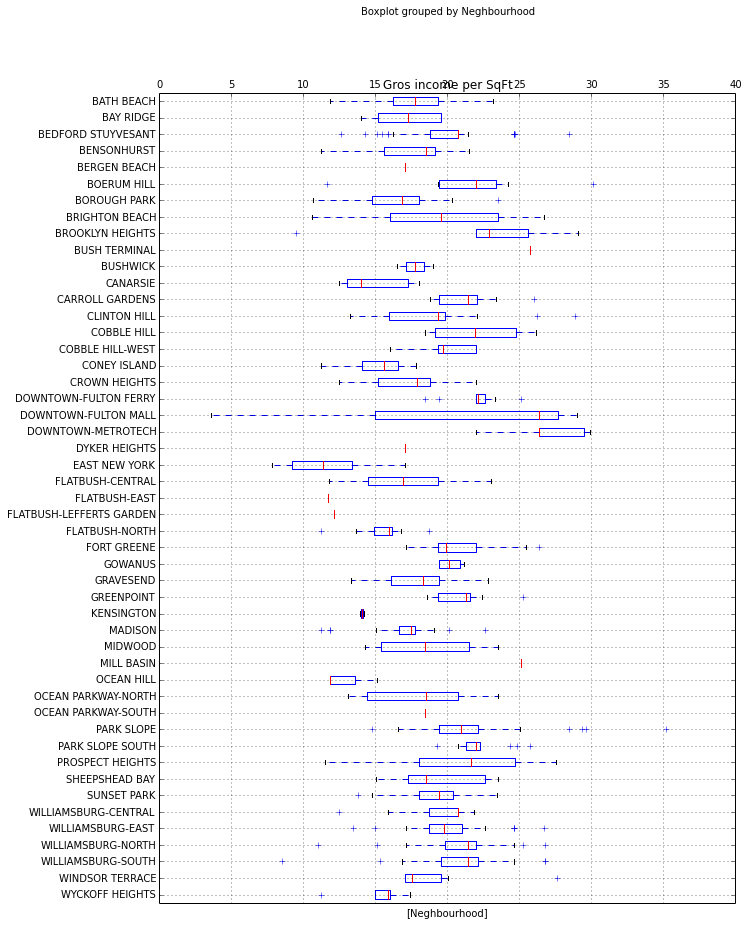

In [11]:
box_plot(ny_rental_data["booklyn"],[11,17],["Neghbourhood","Gros income per SqFt"])

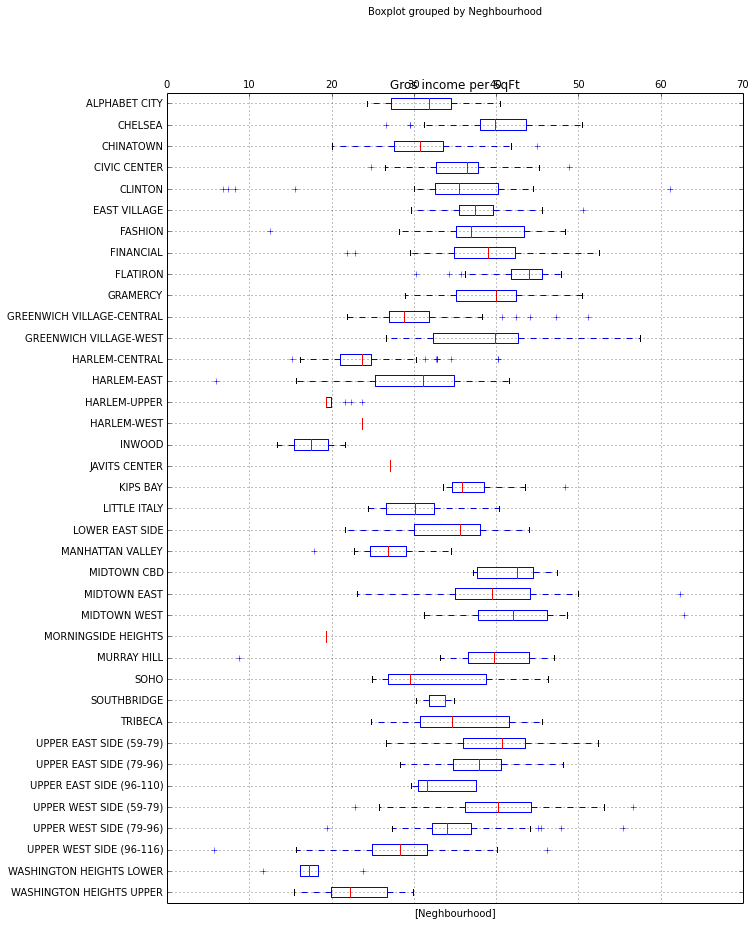

In [12]:
box_plot(ny_rental_data["manhattan"],[11,17],["Neghbourhood","Gros income per SqFt"])

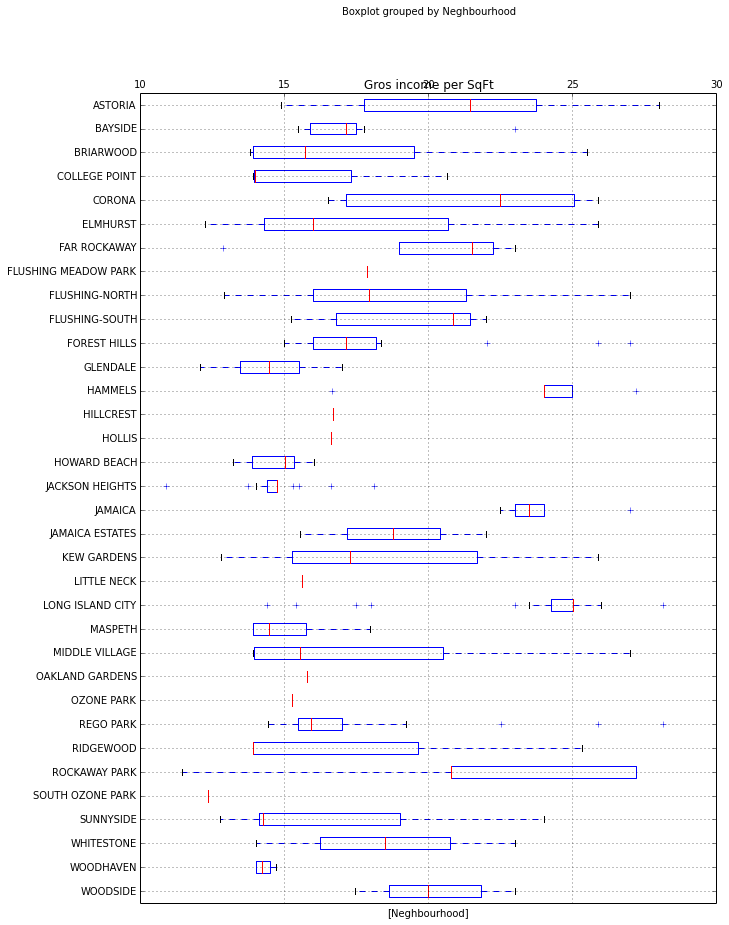

In [13]:
box_plot(ny_rental_data["queens"],[11,17],["Neghbourhood","Gros income per SqFt"])

In [14]:
#box_plot(ny_rental_data["booklyn"],[11,17],["Neghbourhood","Gros income per SqFt"])

In [15]:
def plot_correlation(dataset,features_numbers,feature_names,normalization=True):
    f1_data = [float(i[features_numbers[0]]) for i in dataset]
    f2_data = [float(i[features_numbers[1]]) for i in dataset]
    
    corr_data = [[f1_data[i],f2_data[i]] for i in xrange(0,len(f1_data))]
    corr_data = sorted(corr_data,key=lambda x: x[1],reverse=True)
    
    f1_sorted_data = [i[0] for i in corr_data]
    f2_sorted_data = [i[1] for i in corr_data]
    
    
    if normalization == True:
        f1_mean = np.mean(f1_sorted_data)
        f1_variance = np.sqrt(np.var(f1_sorted_data))
    
        f2_mean = np.mean(f2_sorted_data)
        f2_variance = np.sqrt(np.var(f2_sorted_data))
    
        f1_sorted_data = [(i - f1_mean)/f1_variance for i in f1_sorted_data]
        f2_sorted_data = [(i - f2_mean)/f2_variance for i in f2_sorted_data]
    
    plt.figure()
    plt.rcParams["figure.figsize"] = (15,5)
    plt.plot(f1_sorted_data,c='r',label=feature_names[0])
    plt.plot(f2_sorted_data,c='b',label=feature_names[1])
    plt.legend()
    plt.show()
    
    correlation = pearsonr(f1_sorted_data,f2_sorted_data)[0]
    print "Correlation between '%s' and '%s' is: %lf" %(feature_names[0],feature_names[1],correlation)

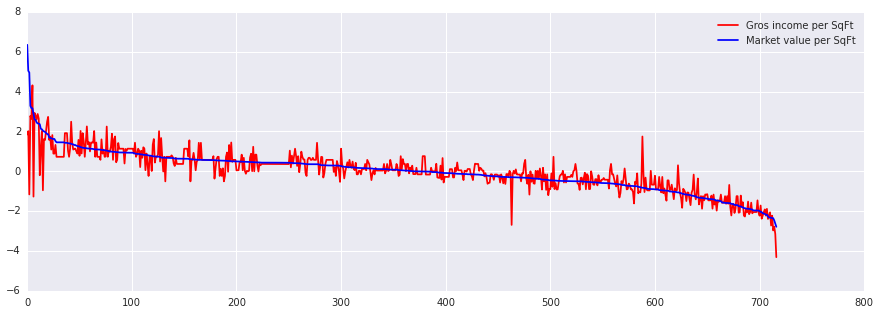

Correlation between 'Gros income per SqFt' and 'Market value per SqFt' is: 0.847969


In [229]:
plot_correlation(ny_rental_data["booklyn"],[17,22],["Gros income per SqFt","Market value per SqFt"])

In [230]:
ny_rental_data["booklyn"][0][12]

'R4-CONDOMINIUM'

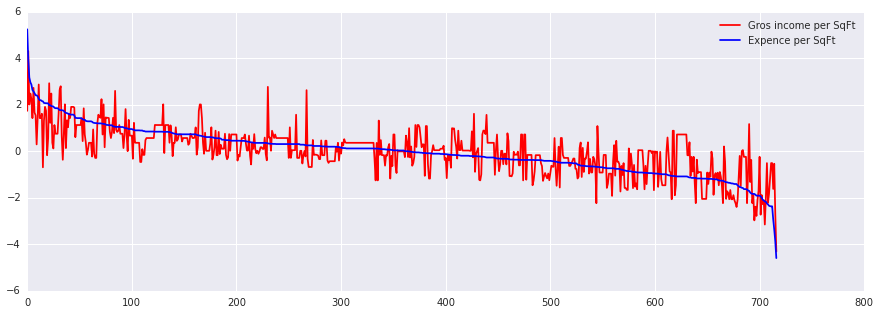

Correlation between 'Gros income per SqFt' and 'Expence per SqFt' is: 0.719317


In [231]:
plot_correlation(ny_rental_data["booklyn"],[17,19],["Gros income per SqFt","Expence per SqFt"])

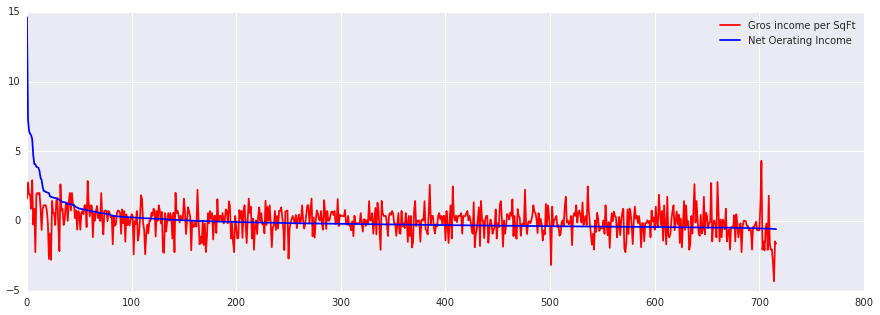

Correlation between 'Gros income per SqFt' and 'Net Oerating Income' is: 0.242706


In [232]:
plot_correlation(ny_rental_data["booklyn"],[17,20],["Gros income per SqFt","Net Oerating Income"])

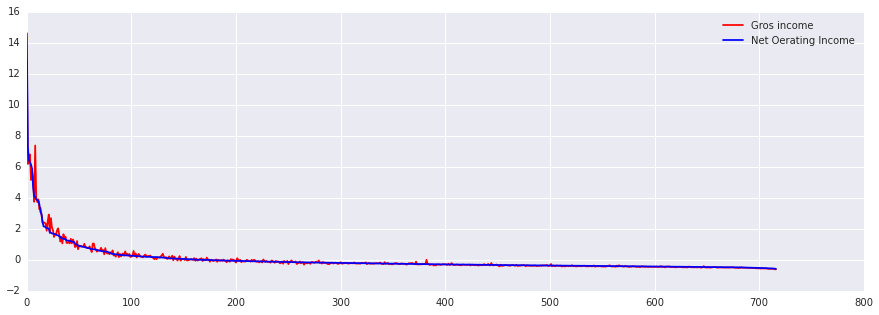

Correlation between 'Gros income' and 'Net Oerating Income' is: 0.984103


In [233]:
plot_correlation(ny_rental_data["booklyn"],[16,20],["Gros income","Net Oerating Income"])

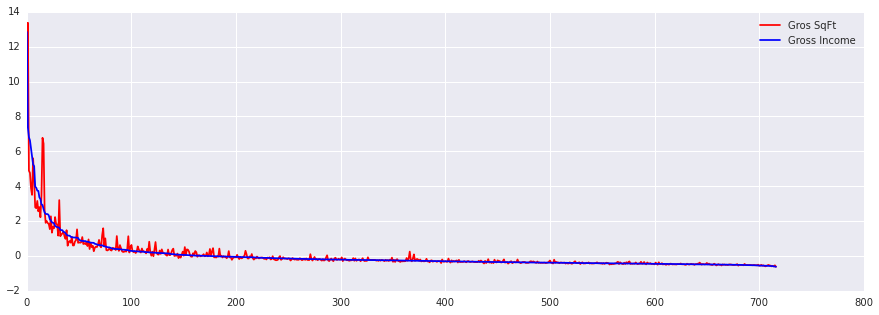

Correlation between 'Gros SqFt' and 'Gross Income' is: 0.920403


In [234]:
plot_correlation(ny_rental_data["booklyn"],[15,16],["Gros SqFt","Gross Income"])

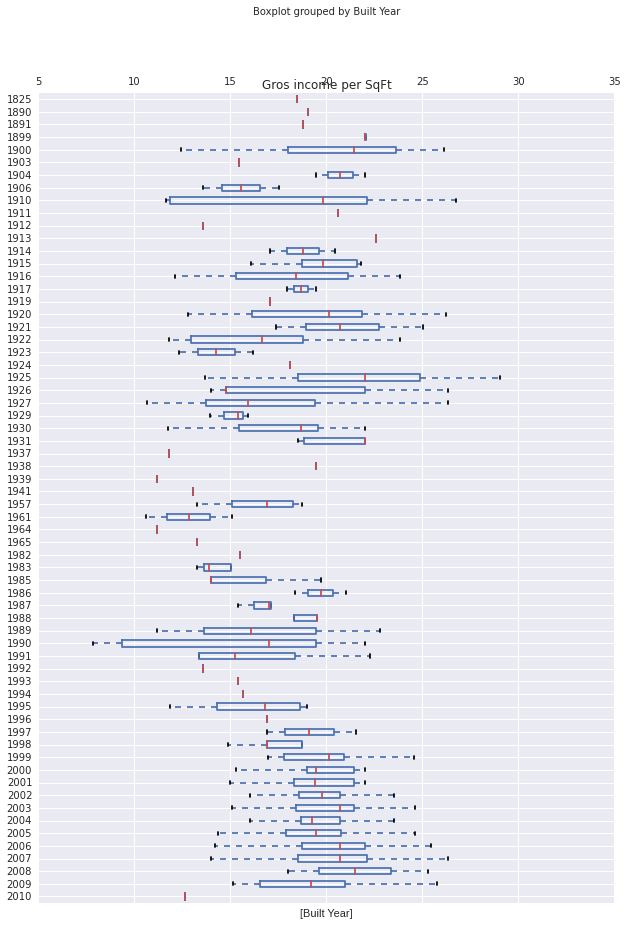

In [235]:
box_plot(ny_rental_data["booklyn"],[14,17],["Built Year","Gros income per SqFt"])

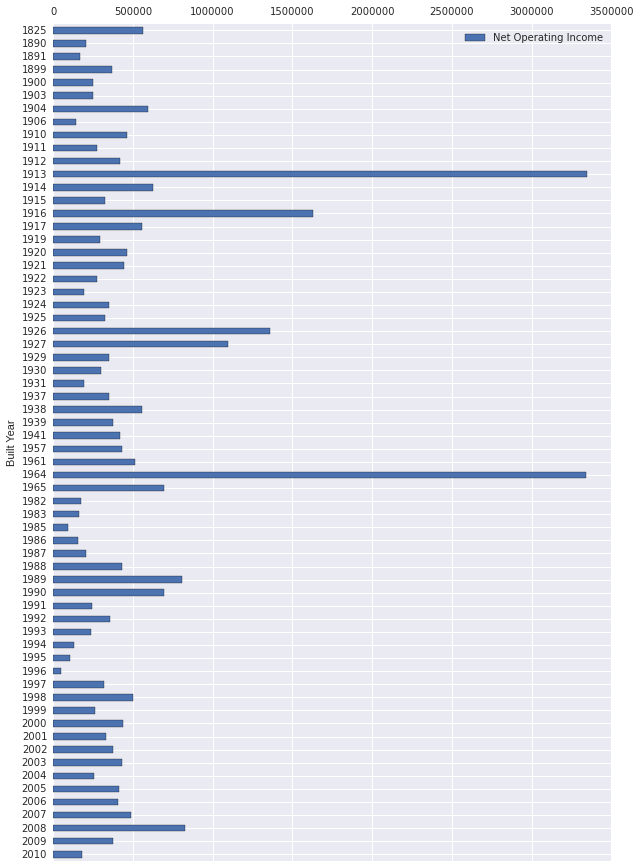

In [78]:
barh_plot(ny_rental_data["booklyn"],[14,20],["Built Year","Net Operating Income"])

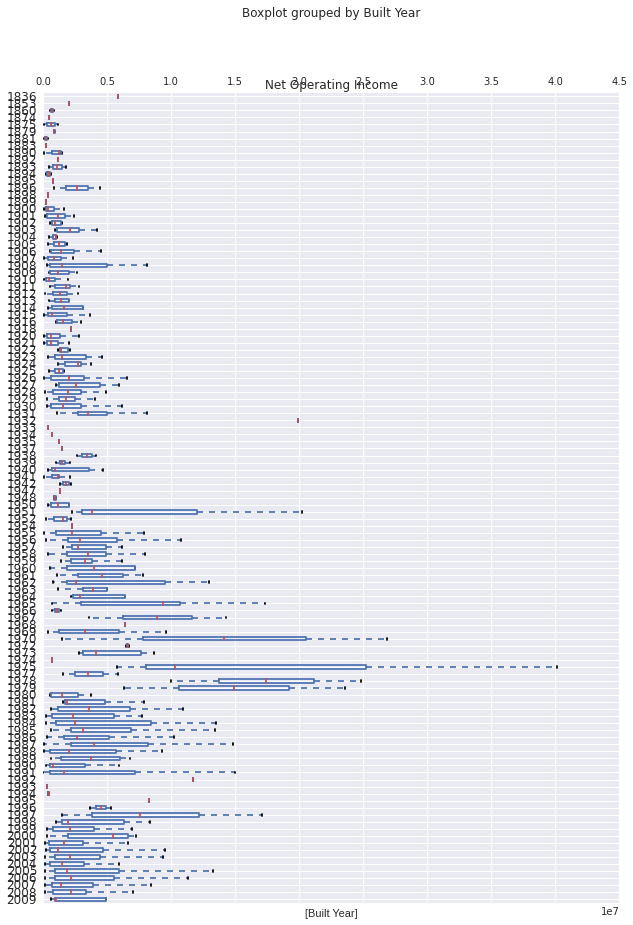

In [79]:
box_plot(ny_rental_data["manhattan"],[14,20],["Built Year","Net Operating Income"])

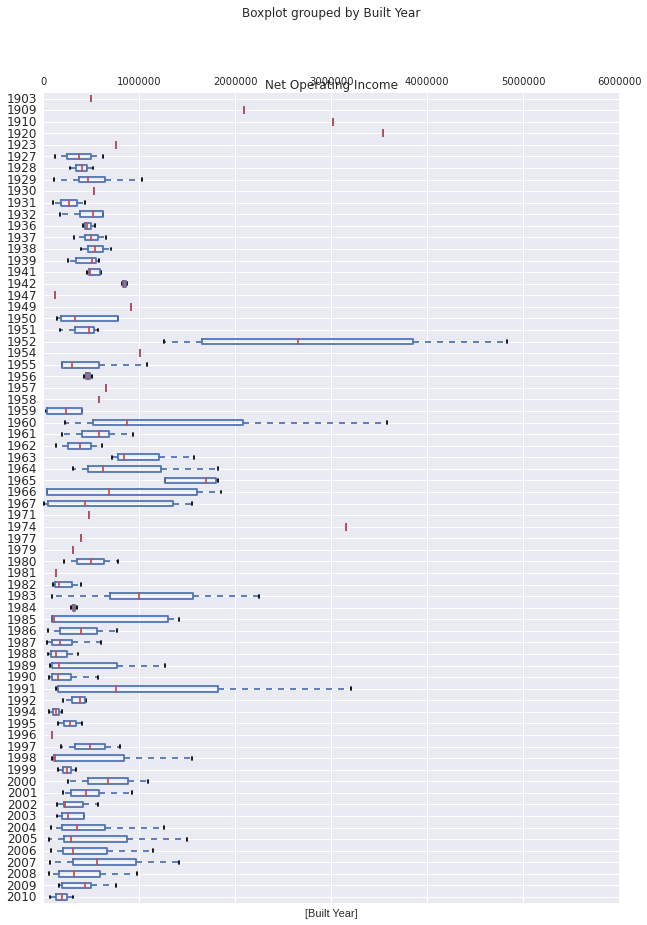

In [80]:
box_plot(ny_rental_data["queens"],[14,20],["Built Year","Net Operating Income"])

In [239]:
def get_feature_percent_rate(dataset,feature_num,feature_name):
    f_values = list(set([i[feature_num] for i in dataset]))
    data_stat = dict()
    for val in f_values:
        data_stat[val] = 0.0
    for item in dataset:
        data_stat[item[feature_num]] += 1
    total = 0
    for val in data_stat:
        total += data_stat[val]
    for val in data_stat:
        data_stat[val] /= float(total)
    
    for val in data_stat:
        print "%s : %lf" %(val,data_stat[val])
        

In [16]:
def polar_chart_plot(dataset,feature_num,feature_name,figure_size=(5,5)):
    f_values = list(set([i[feature_num] for i in dataset]))
    data_stat = dict()
    for val in f_values:
        data_stat[val] = 0.0
    for item in dataset:
        data_stat[item[feature_num]] += 1
    total = 0
    for val in data_stat:
        total += data_stat[val]
    for val in data_stat:
        data_stat[val] /= float(total)
    
    labels = f_values
    sizes = [data_stat[i] for i in data_stat]

    plt.figure()
    plt.rcParams["figure.figsize"] = figure_size
    patches, texts = plt.pie(sizes,startangle=90)
    plt.legend(patches,labels,loc="best")
    plt.axis('equal')
    plt.legend()
    plt.show()

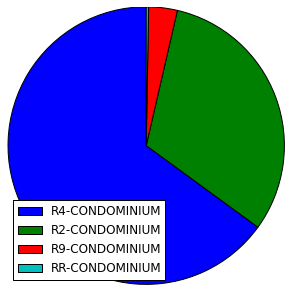

In [17]:
polar_chart_plot(ny_rental_data["booklyn"],12,"Building Classification")

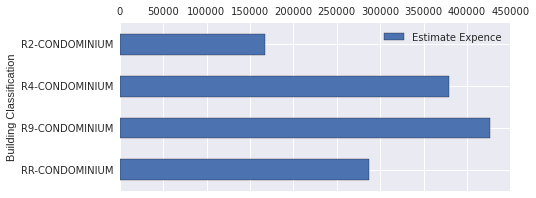

In [42]:
barh_plot(ny_rental_data["booklyn"],[12,18],["Building Classification","Estimate Expence"],figure_size=(7,3))

Средняя стоимость различных типов зданий в Бруклине

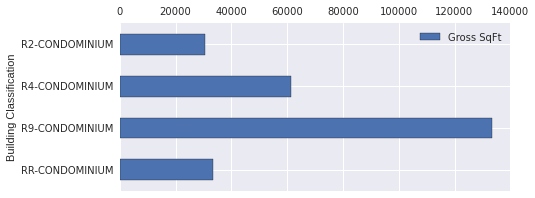

In [43]:
barh_plot(ny_rental_data["queens"],[12,15],["Building Classification","Gross SqFt"],figure_size=(7,3))

В Манхэтене:

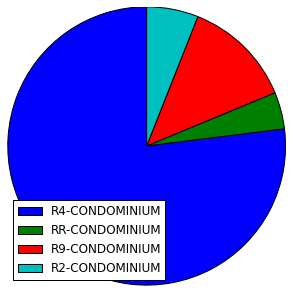

In [42]:
polar_chart_plot(ny_rental_data["manhattan"],12,"Building Classification")

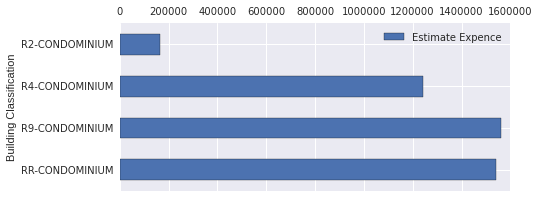

In [40]:
barh_plot(ny_rental_data["manhattan"],[12,18],["Building Classification","Estimate Expence"],figure_size=(7,3))

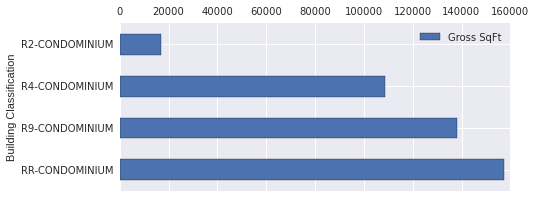

In [41]:
barh_plot(ny_rental_data["manhattan"],[12,15],["Building Classification","Gross SqFt"],figure_size=(7,3))

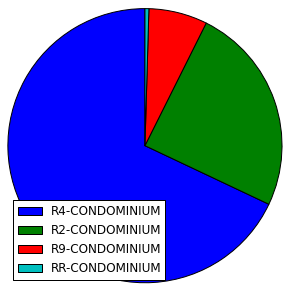

In [147]:
polar_chart_plot(ny_rental_data["queens"],12,"Building Classification")

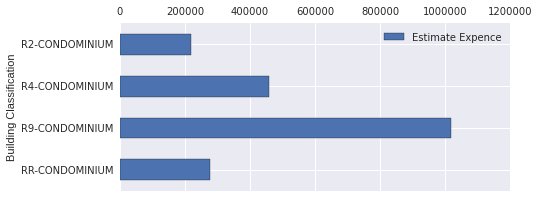

In [39]:
barh_plot(ny_rental_data["queens"],[12,18],["Building Classification","Estimate Expence"],figure_size=(7,3))

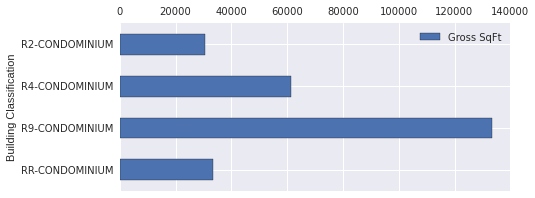

In [38]:
barh_plot(ny_rental_data["queens"],[12,15],["Building Classification","Gross SqFt"],figure_size=(7,3))

In [21]:
def plot_histogram(dataset,feature_num,feature_name,figure_size=(5,5)):
    f_values = sorted(list(set([i[feature_num] for i in dataset])))
    data_stat = dict()
    for val in f_values:
        data_stat[val] = 0.0
    for item in dataset:
        data_stat[item[feature_num]] += 1
    total = 0
    for val in data_stat:
        total += data_stat[val]
    for val in data_stat:
        data_stat[val] /= float(total)
        
    data_list = []    
    count = 0
    for val in data_stat:
        value = 0
        try:
            value = int(val)
        except:
            value = count
            count += 1
            
        data_list.append([value,data_stat[val]])
    data_list = sorted(data_list,key=lambda x: x[0])
    
    X = np.arange(0,len(data_list))
  
    plt.figure()
    plt.rcParams["figure.figsize"] = figure_size
    plt.bar(X,[i[1] for i in data_list],align='center',width=0.5)
    plt.xticks(X,[i[0] for i in data_list],rotation='vertical')
    ymax = max(data_stat.values()) 
    plt.ylim(0.0,ymax)
    plt.show()
    

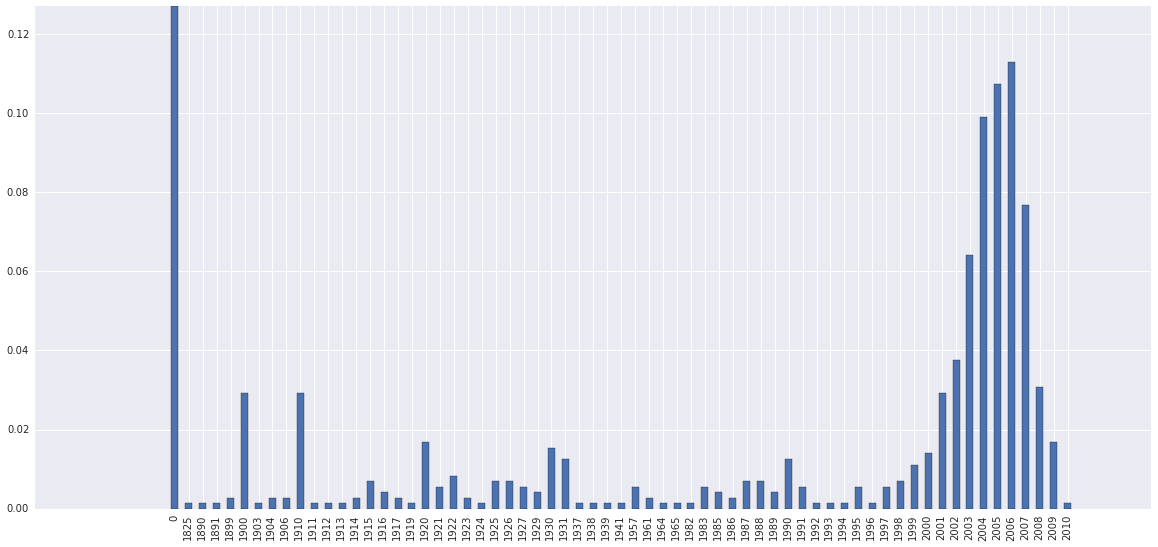

In [30]:
plot_histogram(ny_rental_data["booklyn"],14,"Built Year",figure_size=(20,9))

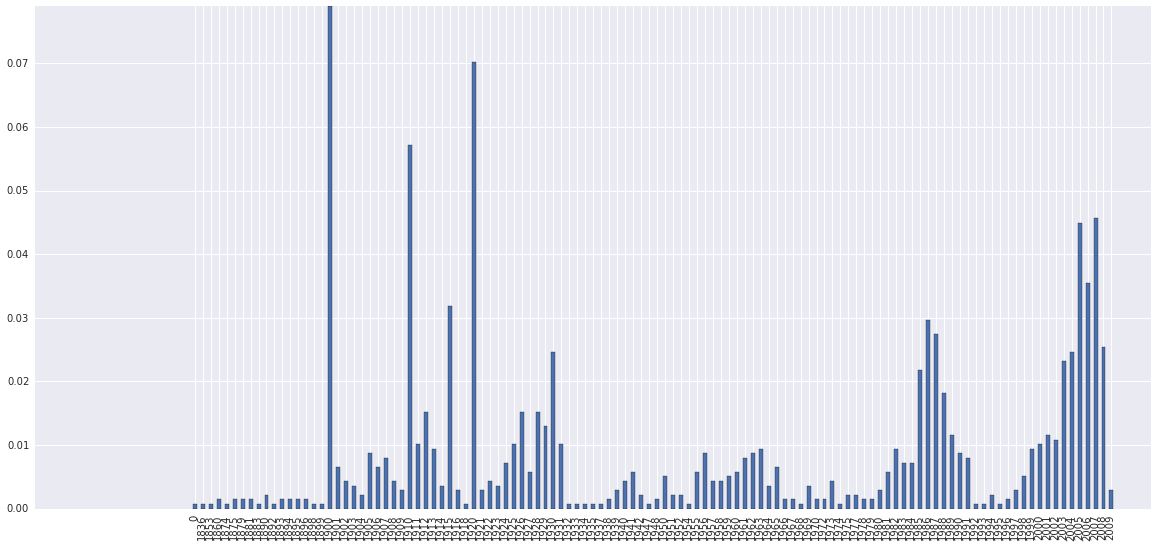

In [31]:
plot_histogram(ny_rental_data["manhattan"],14,"Built Year",figure_size=(20,9))

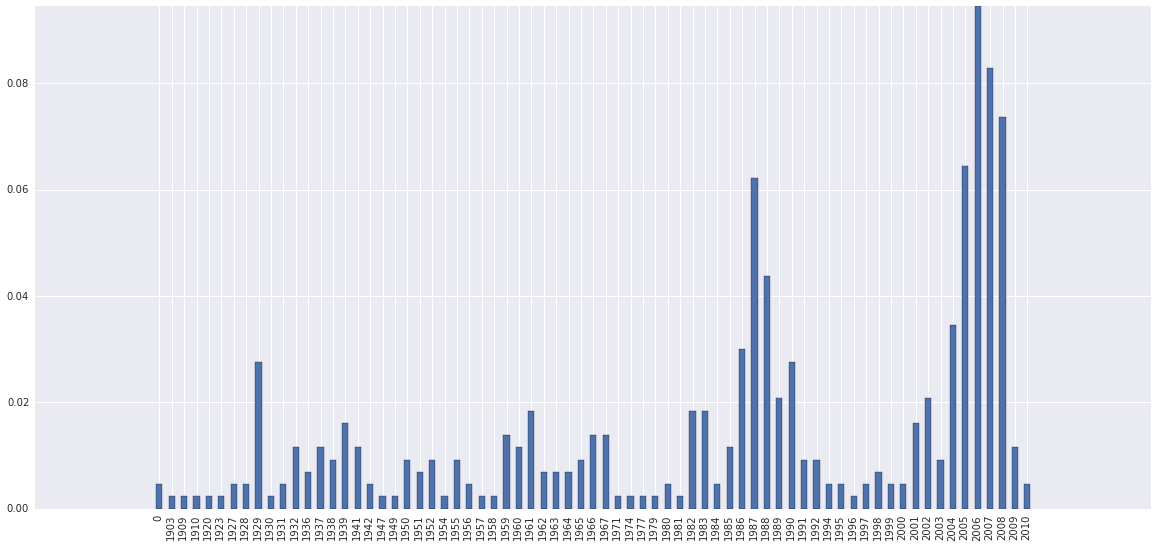

In [32]:
plot_histogram(ny_rental_data["queens"],14,"Built Year",figure_size=(20,9))

In [49]:
def print_prc(dataset,main_feature,extra_feature,figure_size=(10,15)):
    values_names =  sorted(list(set([i[main_feature] for i in dataset])))
    extra_names  =  sorted(list(set([i[extra_feature] for i in dataset])))
    
    data_stat = dict()
    for val in values_names:
        data_stat[val] = np.zeros(len(extra_names))
        
    count = 0
    for item in dataset:
        val = item[main_feature]
        index = extra_names.index(item[extra_feature])
        data_stat[val][index] += 1
        count += 1
        
    total = count
    
    for val in data_stat:
        data_stat[val] = data_stat[val]/float(total)
    
    for val in data_stat:
        print "%s: "%val
        for i in xrange(0,len(extra_names)):
            print "%s : %lf"%(extra_names[i],data_stat[val][i])

In [52]:
#print_prc(ny_rental_data["booklyn"],14,12) #Built Years vs Building Types

In [54]:
import pandas as pd
import string
import numpy as np
import itertools
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy import stats
import matplotlib
import math

# Плотность распределения Gross income Per SqFt в зависимости от районов

In [53]:
import scipy.integrate as integrate

def gaussian(x,x_i,h_i):
    if h_i == 0.0:
        h_i = 0.00001
    return (1.0/(h_i*np.sqrt(2*np.pi)))*np.exp( -0.5 * ((x-x_i)/h_i)**2)

def plot_density(dataset,feature_num,k=10,n_steps=2000):
    data = [float(i[feature_num]) for i in dataset]
    data = sorted(data)
    N = len(data)
    h = []
    
    for i in xrange(0,N):
        if i + k + 1 < N:
            h.append(np.abs(data[i+k+1] - data[i]))
        else:
            h.append(np.abs(data[i] - data[i-k-1]))
            
    l_range = float(min(data))
    r_range = float(max(data))
    
    #print N
    #print l_range
    #print r_range
    #print data
    #print h
    
    pho = []
    steps = []

    st = float(r_range-l_range)/n_steps
    for i in xrange(0,n_steps):
        step = l_range + i*st
        steps.append(step)
        value = 0.0
        for i in xrange(0,N):
            value += gaussian(step,data[i],h[i])
        value /= float(N)
        pho.append(value)
    plt.plot(steps,pho)
    
    
    quantiles = []
    n_cluster = 4
    n_count = 1
    threshold = 1.0/n_cluster
    integral_summ = 0.0
    
    for i in xrange(0,n_steps):
        integral_summ += st*pho[i]
        if integral_summ >= n_count*threshold:
            quantiles.append(l_range + i*st)
            n_count += 1
            
    for q in quantiles:
        plt.axvline(q,c='red')
    plt.show()
    print quantiles
    
    return lambda x: (1.0/N)*sum([gaussian(x,data[i],h[i]) for i in xrange(0,N)])    
    

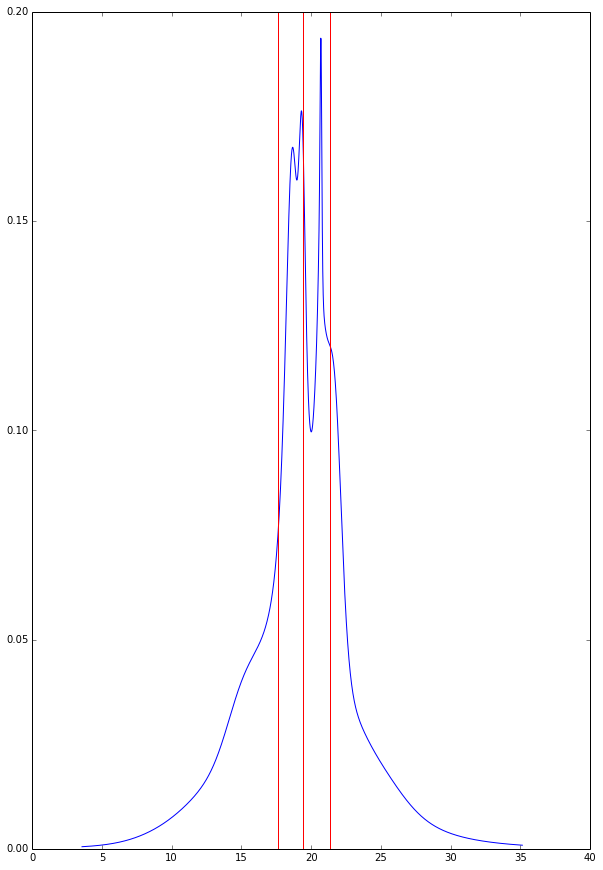

[17.623099999999997, 19.407369999999997, 21.36533]


<function __main__.<lambda>>

In [54]:
plot_density(ny_rental_data["booklyn"],17,k=50)

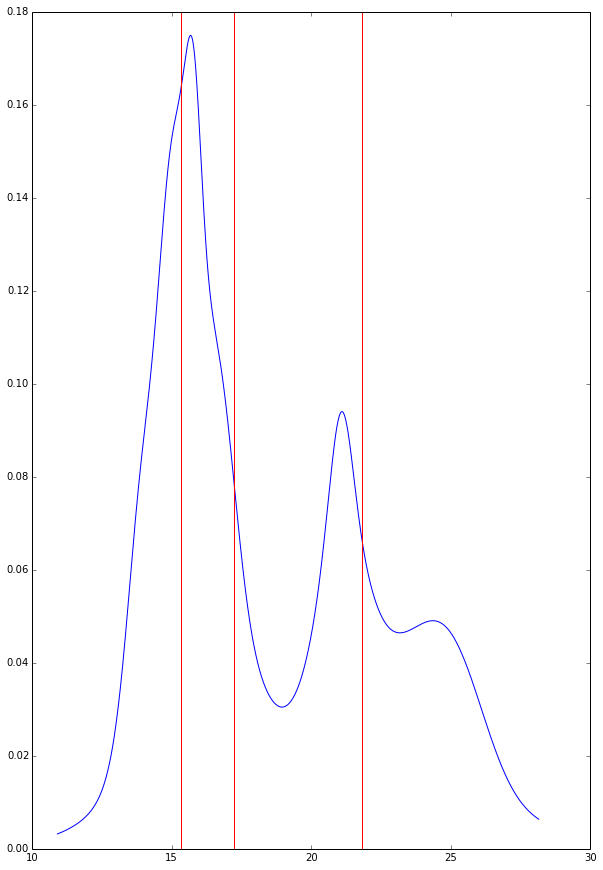

[15.32719, 17.23442, 21.79969]


<function __main__.<lambda>>

In [55]:
plot_density(ny_rental_data["queens"],17,k=30)

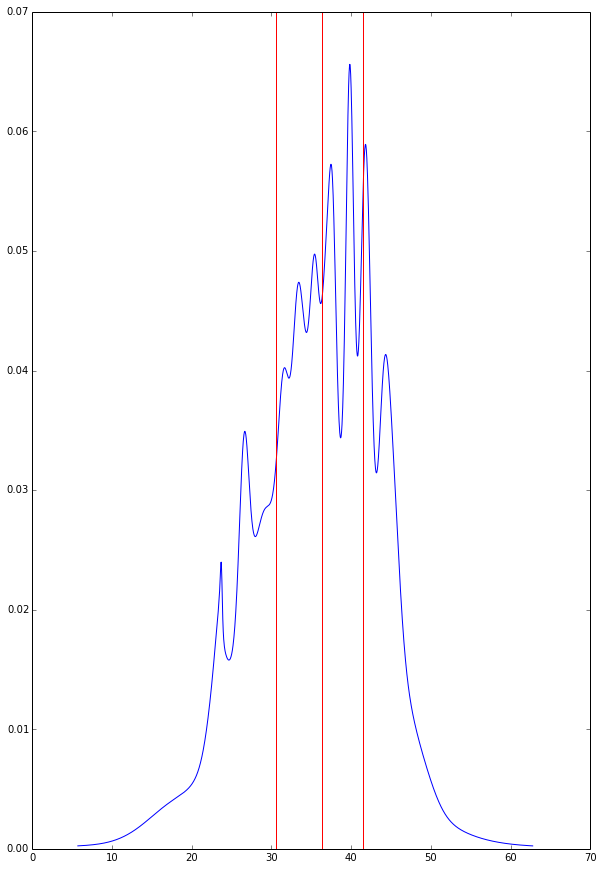

[30.601239999999997, 36.367329999999995, 41.448339999999995]


<function __main__.<lambda>>

In [89]:
plot_density(ny_rental_data["manhattan"],17,k=40)

# Плотность распределения Expence Per SqFt

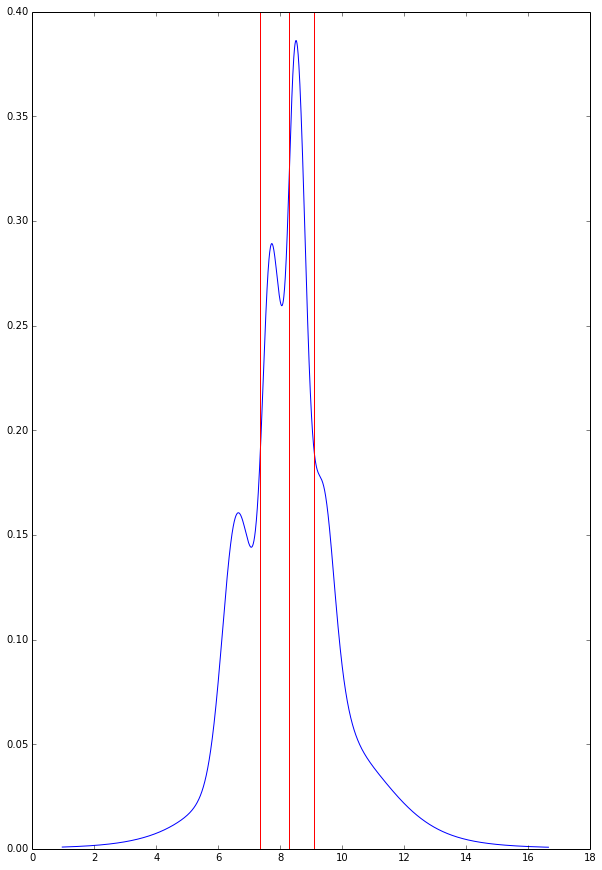

[7.363675, 8.297229999999999, 9.105265000000001]


<function __main__.<lambda>>

In [60]:
plot_density(ny_rental_data["booklyn"],19,k=50)

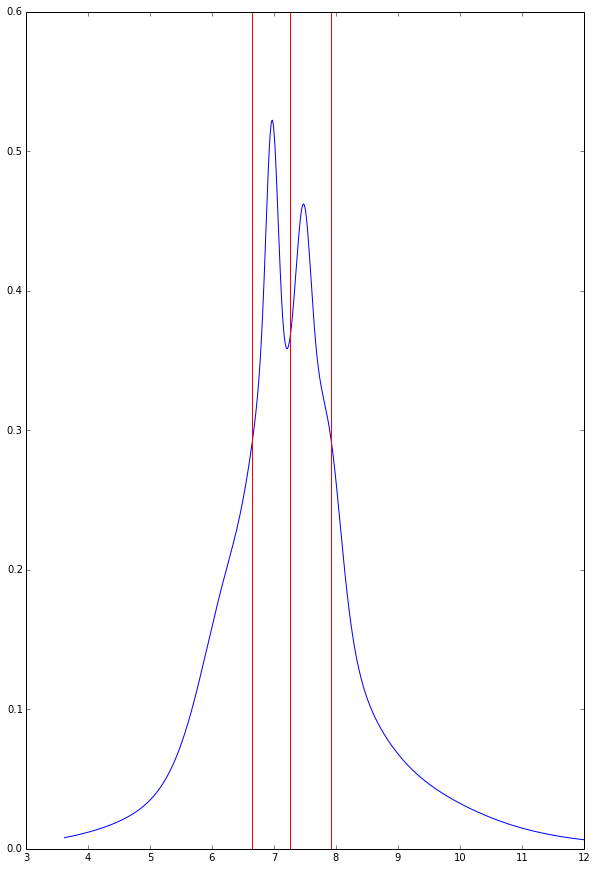

[6.65356, 7.2653, 7.91475]


<function __main__.<lambda>>

In [61]:
plot_density(ny_rental_data["queens"],19,k=50)

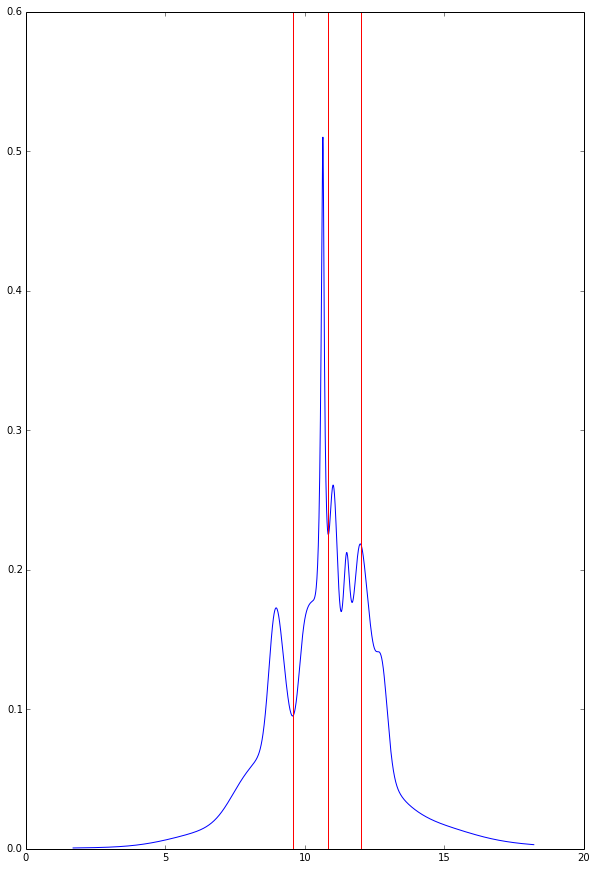

[9.5783, 10.80904, 12.006739999999999]


<function __main__.<lambda>>

In [62]:
plot_density(ny_rental_data["manhattan"],19,k=50)

# Проверка гипотезы о том, что средняя цена жилья в Queens меньше средней цены жилья в Manhattan

В качестве нулевой гипотезы $H_0$ берем гипотезу о равенстве средних $m_{Q} = m_{M}$ 


В качестве альтернативы возьмем $H_1$ : $m_{Q} < m_{M}$

В качестве критерия будем использовать $Z = \frac{m_{Q} - m_{M}}{ \sqrt{\frac{\sigma_Q}{n_Q}  + \frac{\sigma_M}{n_M} } }$

Данная величина будет иметь нормальное распределение со средним 0 и дисперсией 1

In [16]:
import scipy.stats as stats

queens_data = [float(i[19]) for i in ny_rental_data["queens"]]
manhattan_data = [float(i[19]) for i in ny_rental_data["manhattan"]]

queens_mean = np.mean(queens_data)
queens_var  = np.var(queens_data)
n_queens = float(len(queens_data))
      
manhattan_mean = np.mean(manhattan_data)
manhattan_var = np.var(manhattan_data)
n_manhattan = float(len(manhattan_data))

print "\nQueens:"
print "Mean: %lf" % queens_mean
print "Variance: %lf" % queens_var
print "n_ : %lf" % n_queens

print "\nManhattan:"
print "Mean: %lf" % manhattan_mean
print "Variance: %lf" % manhattan_var
print "n_ : %lf" % n_manhattan

Z = (queens_mean - manhattan_mean)/(np.sqrt(queens_var/n_queens + manhattan_var/n_manhattan))
print "\n"
print "Z:%lf  t_cr (0.05) : %lf"%(Z,stats.norm.ppf(0.05))
print "Z < t_cr => гипотеза верна"



Queens:
Mean: 7.351406
Variance: 1.385700
n_ : 434.000000

Manhattan:
Mean: 10.801376
Variance: 4.251133
n_ : 1381.000000


Z:-43.565379  t_cr (0.05) : -1.644854
Z < t_cr => гипотеза верна


# Проверка гипотезы о том, что средняя цена жилья в Queens равна средней цене жилья в Brooklyn

В качестве нулевой гипотезы $H_0$ берем гипотезу о равенстве средних $m_{Q} = m_{B}$ 

В качестве альтернативы возьмем $H_1$ : $m_{Q} \neq m_{B}$

В качестве критерия будем использовать $Z = \frac{m_{Q} - m_{M}}{ \sqrt{\frac{\sigma_Q}{n_Q}  + \frac{\sigma_M}{n_M} } }$

In [87]:
queens_data = [float(i[19]) for i in ny_rental_data["queens"]]
brooklyn_data = [float(i[19]) for i in ny_rental_data["booklyn"]]

queens_mean = np.mean(queens_data)
queens_var  = np.var(queens_data)
n_queens = float(len(queens_data))
      
brooklyn_mean = np.mean(brooklyn_data)
brooklyn_var = np.var(brooklyn_data)
n_brooklyn = float(len(brooklyn_data))

print "\nQueens:"
print "Mean: %lf" % queens_mean
print "Variance: %lf" % queens_var
print "n_ : %lf" % n_queens

print "\nBrooklyn:"
print "Mean: %lf" % brooklyn_mean
print "Variance: %lf" % brooklyn_var
print "n_ : %lf" % n_brooklyn

Z = (queens_mean - brooklyn_mean)/(np.sqrt(queens_var/n_queens + brooklyn_var/n_brooklyn))
print "Z: %lf"%Z
print "Z не принадлежит промежутку (-1.64,1.64) => средние значения не равны"



Queens:
Mean: 7.351406
Variance: 1.385700
n_ : 434.000000

Brooklyn:
Mean: 8.294184
Variance: 2.543297
n_ : 717.000000
Z: -11.483649
Z не принадлежит промежутку (-1.64,1.64) => средние значения не равны
Альтернативная гипотеза верна


# Загрузка данных

In [92]:
def fix_columns(df):
    cols=list(df.columns)
    real_columns = ['COMPARABLE RENTAL 1 ']#[u'Boro-Block-Lot',u'Condo Section',u'Address',u'Neighborhood',u'Building Classification',\
                    #u'Total Units',u'Year Built',u'Gross SqFt',u'Est. Gross Income',u'Gross Income per SqFt',\
                    #u'Full Market Value',u'Market Value per SqFt',u'Boro-Block-Lot', u'Address',u'Neighborhood',\
                    #u'Building Classification',u'Total Units', u'Year Built',u'Gross SqFt',u'Est. Gross Income',\
                    #u'Gross Income per SqFt',u'Full Market Value',u'Market Value per SqFt',u'Dist. from Coop in miles',\
                    #u'Boro-Block-Lot', u'COMPARABLE RENTAL 2  Address',u'Neighborhood',u'Building Classification',\
                    #u'Total Units', u'COMPARABLE RENTAL 2  Year Built',u'Gross SqFt',u'Est. Gross Income',\
                    #u'Gross Income per SqFt',u'Full Market Value',u'Market Value per SqFt',u'Dist. from Coop in miles']
    to_remove = ['QUEENS CONDOMINIUM PROPERTY ', 'BRONX CONDOMINIUM PROPERTY ', 'BROOKLYN CONDOMINIUM PROPERTY ',\
                 'MANHATTAN CONDOMINIUM PROPERTY ', 'STATEN ISLAND CONDOMINIUM PROPERTY ',\
                'QUEENS CONDOMINIUMS COMPARABLE PROPERTIES ',\
                 'BRONX CONDOMINIUMS COMPARABLE PROPERTIES ','BROOKLYN CONDOMINIUMS COMPARABLE PROPERTIES ',\
                 'MANHATTAN CONDOMINIUMS COMPARABLE PROPERTIES ', 'STATEN ISLAND CONDOMINIUMS COMPARABLE PROPERTIES ']
    rental = 'COMPARABLE RENTAL '
    rm = []
    table = {}
    for c in cols:
        c_new = ' '.join(filter(lambda s: s!= '\xc3\xa2\xc2\x80\xc2\x93', c.split()))
        flag = True
        if flag:
            if c_new.startswith('COMPARABLE RENTAL 3'):
                rm.append(c)
        if flag:
            if c_new.startswith(rental):
                table[c] = ('RENTAL ' + c_new[len(rental):])
                flag = not flag
        if flag:
            for prefix in to_remove:
                if c_new.startswith(prefix):
                    table[c] = ('PROPERTY ' + c_new[len(prefix):])
                    flag = not flag
                    break
        if flag:    
            table[c] = c_new
    df = df.drop(rm, axis=1)
    df = df.rename(index=str, columns=table)
    return df

In [93]:
df = pd.DataFrame()
for i in range(2008, 2012):
    for j in ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten_Island']:
        new_df = pd.read_csv('Datasets/Condominium/%i_%i/DOF__Condominium_Comparable_Rental_Income___%s___FY_%i_%i.csv'\
        % (i, i+1, j, i, i+1))
        new_df['Year'] = i
        new_df['District'] = j

        
        df = pd.concat([df, fix_columns(new_df)], ignore_index=True)
        
        
        #DOF__Condominium_comparable_rental_Income___Bronx___FY_2010_2011.csv
        #DOF__Condominium_Comparable_Rental_Income___Bronx___FY_2010_2011.csv

In [94]:
for c in df.columns:
    if df[c].count() < 8000:
        df = df.drop([c], axis=1)
df.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8449 entries, 0 to 8448
Data columns (total 23 columns):
District                            8449 non-null object
PROPERTY Address                    8449 non-null object
PROPERTY Boro-Block-Lot             8449 non-null object
PROPERTY Building Classification    8449 non-null object
PROPERTY Condo Section              8449 non-null object
PROPERTY Full Market Value          8449 non-null int64
PROPERTY Gross Income per SqFt      8449 non-null float64
PROPERTY Gross SqFt                 8449 non-null int64
PROPERTY Market Value per SqFt      8448 non-null float64
PROPERTY Neighborhood               8449 non-null object
PROPERTY Total Units                8449 non-null int64
PROPERTY Year Built                 8353 non-null float64
RENTAL 1 Address                    8448 non-null object
RENTAL 1 Boro-Block-Lot             8449 non-null object
RENTAL 1 Building Classification    8449 non-null object
RENTAL 1 Full Market Value          84

In [95]:
df=df.dropna()
df.head(5)

,District,PROPERTY Address,PROPERTY Boro-Block-Lot,PROPERTY Building Classification,PROPERTY Condo Section,PROPERTY Full Market Value,PROPERTY Gross Income per SqFt,PROPERTY Gross SqFt,PROPERTY Market Value per SqFt,PROPERTY Neighborhood,...,RENTAL 1 Boro-Block-Lot,RENTAL 1 Building Classification,RENTAL 1 Full Market Value,RENTAL 1 Gross Income per SqFt,RENTAL 1 Gross SqFt,RENTAL 1 Market Value per SqFt,RENTAL 1 Neighborhood,RENTAL 1 Total Units,RENTAL 1 Year Built,Year
0,Bronx,"717 KELLY STREET\nBronx, New York\n(40.8158575...",2-02686-7501,R2-WALK-UP,53-R1,583003,11.50,14384,40.5,MORRISANIA/LONGWOOD,...,2-02427-0001,C7-WALK-UP,395000,10.58,11055,35.7,MELROSE/CONCOURSE,16,1923,2008
1,Bronx,"1209 NELSON AVENUE\nBronx, New York\n(40.83785...",2-02516-7501,R4-ELEVATOR,73-R1,1609988,16.33,24262,66.0,HIGHBRIDGE/MORRIS HEIGHTS,...,2-02474-0051,C1-WALK-UP,1190000,16.47,17750,67.0,MELROSE/CONCOURSE,20,1910,2008
2,Bronx,"3240 NETHERLAND AVENUE\nBronx, New York\n(40.8...",2-05787-7501,R4-ELEVATOR,30-R1,760999,18.52,10108,75.0,RIVERDALE,...,2-03145-0025,C1-WALK-UP,360000,13.52,9424,38.2,FORDHAM,16,1925,2008
3,Bronx,"2718 SCHURZ AVENUE\nBronx, New York\n(40.81359...",2-05604-7501,R4-ELEVATOR,16-R1,4000024,15.50,63416,63.0,THROGS NECK,...,2-03142-0200,D1-ELEVATOR,4880000,18.25,94682,52.0,FORDHAM,99,1972,2008
4,Bronx,"720 217 STREET\nBronx, New York\n(40.881931979...",2-04664-7501,R2-WALK-UP,75-R1,1310008,16.76,19225,68.0,WILLIAMSBRIDGE,...,2-03740-0052,C1-WALK-UP,612000,9.67,18720,32.7,SOUNDVIEW,25,1926,2008


In [96]:
df.to_csv('condominium.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 0 to 8448
Data columns (total 23 columns):
District                            8351 non-null object
PROPERTY Address                    8351 non-null object
PROPERTY Boro-Block-Lot             8351 non-null object
PROPERTY Building Classification    8351 non-null object
PROPERTY Condo Section              8351 non-null object
PROPERTY Full Market Value          8351 non-null int64
PROPERTY Gross Income per SqFt      8351 non-null float64
PROPERTY Gross SqFt                 8351 non-null int64
PROPERTY Market Value per SqFt      8351 non-null float64
PROPERTY Neighborhood               8351 non-null object
PROPERTY Total Units                8351 non-null int64
PROPERTY Year Built                 8351 non-null float64
RENTAL 1 Address                    8351 non-null object
RENTAL 1 Boro-Block-Lot             8351 non-null object
RENTAL 1 Building Classification    8351 non-null object
RENTAL 1 Full Market Value          83

# Проверка статистических гипотез

In [97]:
df.groupby('District').mean()

,PROPERTY Full Market Value,PROPERTY Gross Income per SqFt,PROPERTY Gross SqFt,PROPERTY Market Value per SqFt,PROPERTY Total Units,PROPERTY Year Built,RENTAL 1 Full Market Value,RENTAL 1 Gross Income per SqFt,RENTAL 1 Gross SqFt,RENTAL 1 Market Value per SqFt,RENTAL 1 Total Units,RENTAL 1 Year Built,Year
District,,,,,,,,,,,,,
Bronx,8.198825e+06,14.195907,240537.046414,50.763291,237.320675,1971.367089,3.412865e+06,13.778945,74840.308017,44.556456,69.894515,1950.464135,2009.658228
Brooklyn,3.180694e+06,18.545637,40054.782843,81.101176,76.644608,1759.053922,2.719538e+06,20.194765,34228.954412,77.045828,39.215196,1942.656373,2009.711275
Manhattan,2.055415e+07,34.282893,114231.795945,167.084625,93.808024,1941.921700,2.394212e+07,36.664062,126587.916954,179.352552,126.105047,1951.229508,2009.625324
Queens,4.151240e+06,17.740827,62911.063338,71.381446,64.119970,1932.971684,4.311484e+06,17.916028,65241.362146,70.575000,71.824143,1973.789121,2009.719821
Staten_Island,3.165156e+06,6.218542,80956.687500,39.809062,78.989583,1548.395833,3.432448e+06,12.786354,93324.312500,40.776667,105.072917,1965.875000,2009.500000


In [98]:
df.mean()

PROPERTY Full Market Value        1.312365e+07
PROPERTY Gross Income per SqFt    2.688758e+01
PROPERTY Gross SqFt               9.106647e+04
PROPERTY Market Value per SqFt    1.259367e+02
PROPERTY Total Units              8.874698e+01
PROPERTY Year Built               1.892124e+03
RENTAL 1 Full Market Value        1.478481e+07
RENTAL 1 Gross Income per SqFt    2.870415e+01
RENTAL 1 Gross SqFt               9.231695e+04
RENTAL 1 Market Value per SqFt    1.314619e+02
RENTAL 1 Total Units              9.431948e+01
RENTAL 1 Year Built               1.952907e+03
Year                              2.009661e+03
dtype: float64

## 1) Простая гипотеза

### 1.1) Зависит ли площадь от того, арендуется или покупается недвижимость?
$$H_0: S_{rental} \neq S_{property}$$
$$H_1: S_{rental} = S_{property}$$

Independent two-sample t-test:

In [99]:
alpha = 0.05
rent = df['RENTAL 1 Gross SqFt']
prop = df['PROPERTY Gross SqFt']
print "%s гипотеза верна" %("Нулевая" if stats.ttest_ind(prop, rent)[1] > alpha else "Альтернативная")

Нулевая гипотеза верна


### 1.2) Зависит ли площадь от района?
$$H_0: S_{district_1} \neq S_{district_2}$$
$$H_1: S_{district_1} = S_{district_2}$$

In [63]:
alpha = 0.05
rent = df['RENTAL 1 Gross SqFt']
prop = df['PROPERTY Gross SqFt']
print "%s гипотеза верна" %("Нулевая" if stats.ttest_ind(prop, rent)[1] > alpha else "Альтернативная")

Нулевая гипотеза верна


In [64]:
dstr = df["District"].unique()
m = pd.DataFrame(index=dstr, columns=dstr)
for d1 in dstr:
    for d2 in dstr:
        m[d1][d2] = "Not equal" if (stats.ttest_ind(pd.concat([rent[df.District == d1], prop[df.District == d1]], ignore_index=True),\
                                                    pd.concat([rent[df.District == d2], prop[df.District == d2]], ignore_index=True))[1] < alpha) else "Equal"
m

,Bronx,Brooklyn,Manhattan,Queens,Staten_Island
Bronx,Equal,Not equal,Not equal,Not equal,Equal
Brooklyn,Not equal,Equal,Not equal,Not equal,Not equal
Manhattan,Not equal,Not equal,Equal,Not equal,Not equal
Queens,Not equal,Not equal,Not equal,Equal,Not equal
Staten_Island,Equal,Not equal,Not equal,Not equal,Equal


## 2) Сложная гипотеза: критерий согласия 

### 2.1) Доход с квадратного фута распределен так же, как и стоимость квадратного фута

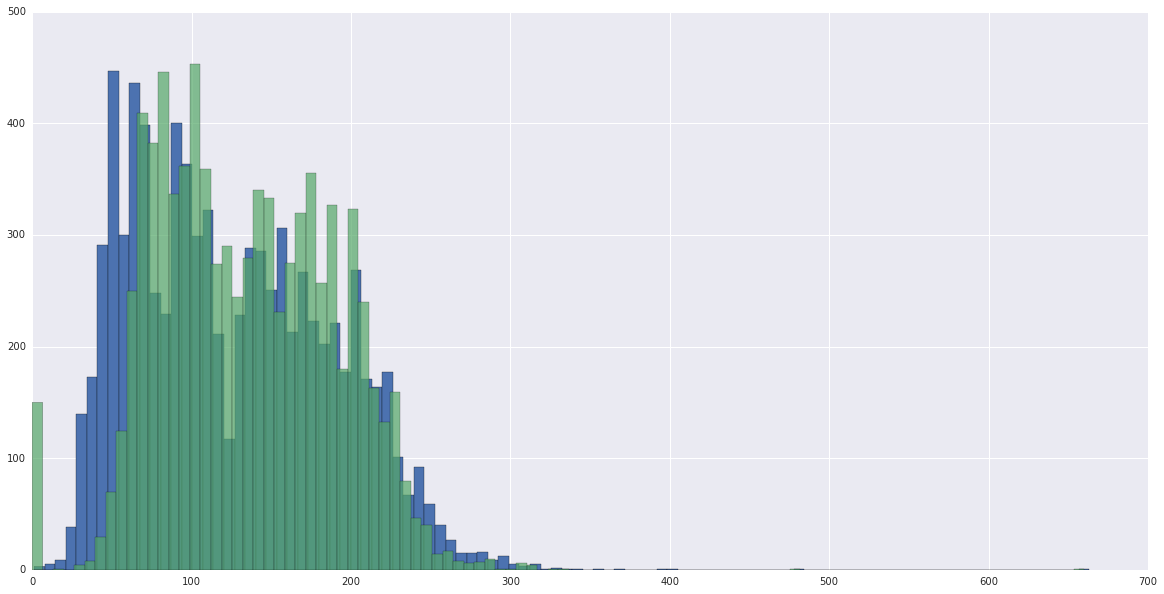

In [65]:
plt.figure(figsize=(20,10))
df['PROPERTY Market Value per SqFt'].hist(bins=100)
(df['PROPERTY Gross Income per SqFt'] * 5).hist(bins=100, alpha=.7)
plt.savefig('rent.png')

In [69]:
coef = stats.pearsonr(pd.concat([df['PROPERTY Market Value per SqFt'], df['RENTAL 1 Market Value per SqFt']], ignore_index=True),\
            pd.concat([df['PROPERTY Gross Income per SqFt'], df['RENTAL 1 Gross Income per SqFt']], ignore_index=True))
coef

(0.950449663750633, 0.0)

In [68]:
alpha = 0.2

print "Данные сильно скоррелированы" if coef[1] < alpha else "Данные слабо скоррелированы"

Данные сильно скоррелированы


# Критерий Шапиро-Уилка

Данный тест позволяет проверить гипотезу о нормальном распределении распределении генеральной совокупности.

$$H_0: X_1, ..., X_n \sim \mathbb{N} ,$$
$$H_1: X_1, ..., X_n \, \, \text{not} \, \, \mathbb{N}.$$

$$ W = \frac{(\sum_{i=1}^{n}a_i x_{(i)})^2}{\sum_{i=1}^{n}(x_{(i)} - \bar{x})^2}.$$

где $x_{(i)}$ - поряковая статистика, $a_{i}$ - затабулированные константы.

In [71]:
stats.shapiro(pd.concat([df['PROPERTY Market Value per SqFt'], df['RENTAL 1 Market Value per SqFt']], ignore_index=True))

(0.9530413150787354, 0.0)

In [73]:
for c in df.columns:
    try:
        print c, stats.shapiro(df[c])
    except:
        continue

 District PROPERTY Address PROPERTY Boro-Block-Lot PROPERTY Building Classification PROPERTY Condo Section PROPERTY Full Market Value (0.5490279197692871, 0.0)
PROPERTY Gross Income per SqFt (0.9780145287513733, 5.808397226498724e-34)
PROPERTY Gross SqFt (0.3969481587409973, 0.0)
PROPERTY Market Value per SqFt (0.959919810295105, 5.675258780515509e-43)
PROPERTY Neighborhood PROPERTY Total Units (0.01969468593597412, 0.0)
PROPERTY Year Built (0.2617639899253845, 0.0)
RENTAL 1 Address RENTAL 1 Boro-Block-Lot RENTAL 1 Building Classification RENTAL 1 Full Market Value (0.5506508350372314, 0.0)
RENTAL 1 Gross Income per SqFt (0.9634772539138794, 1.6640419263857203e-41)
RENTAL 1 Gross SqFt (0.5347134470939636, 0.0)
RENTAL 1 Market Value per SqFt (0.9453558325767517, 0.0)
RENTAL 1 Neighborhood RENTAL 1 Total Units (0.5716317892074585, 0.0)
RENTAL 1 Year Built (0.8993226885795593, 0.0)
Year (0.8428319692611694, 0.0)


Нормально распределенное величины:
- Gross Income per SqFt
- Market Value per SqFt